# Predicting the quality of red wine

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
%matplotlib inline

#### Load winequality-red.csv and display first few rows

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Get info about the columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## EDA

<AxesSubplot:xlabel='quality', ylabel='count'>

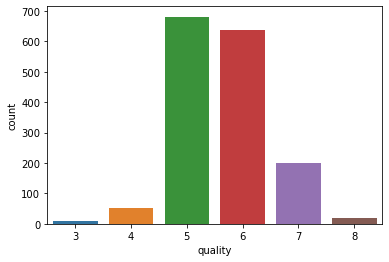

In [4]:
sns.countplot(x='quality',data=df)

#### Now we will make plots of the wine quality showing the distribution according to values of each of the other variables. Instead of countplot that takes one variable and counts how many times it appears in the dataset, we will use barplot , which takes two variables. We will keep quality on the x axis and the other variable on the y axis. The y axis shows the mean of the variable for each value of quality.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

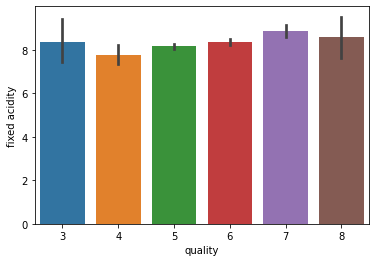

In [5]:
sns.barplot(x='quality',y='fixed acidity',data=df)

#### This shows that on average, the fixed acidity is nearly uniform over quality values so it won't be a good predictor. 

####  If we wanted to compare the actual distributions of fixed acidity by quality we could make boxplots:

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

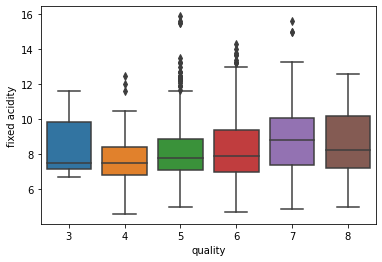

In [6]:
sns.boxplot(x='quality', y='fixed acidity',data=df)

#### Now make barplots for all the other variables by quality

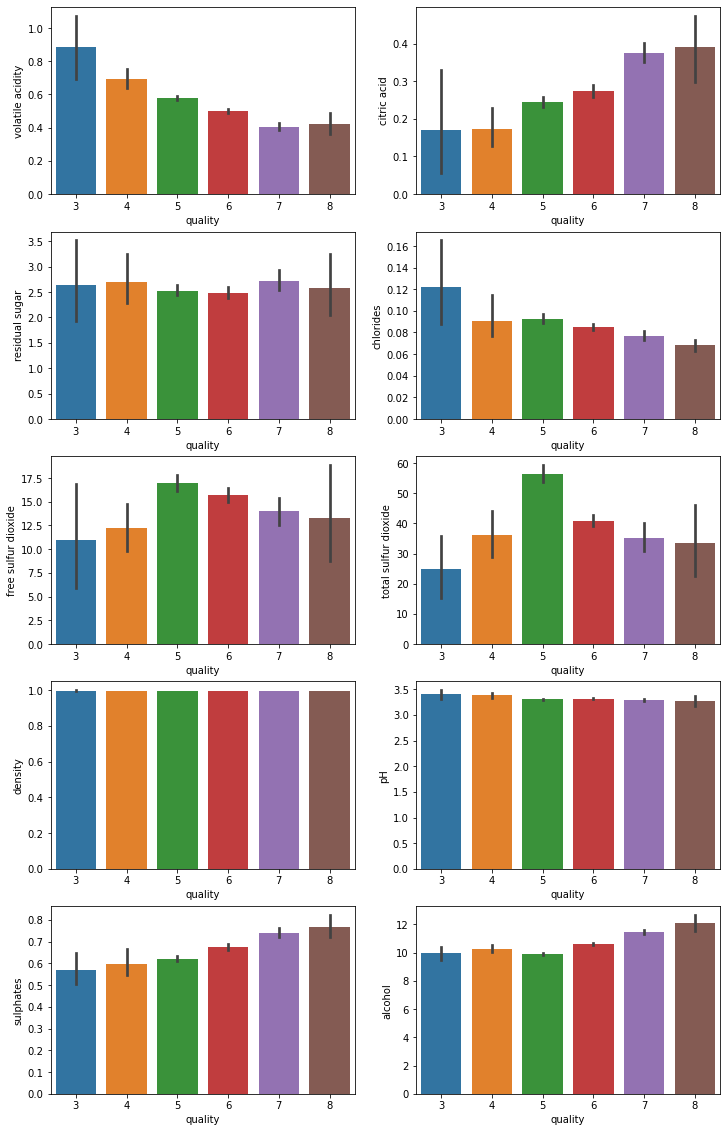

In [7]:
fig,axes=plt.subplots(5,2,figsize=(12,20))
for var, ax in zip(df.columns[1:11],axes.flat):
    sns.barplot(x='quality',y=var,data=df,ax=ax)
    

#### Which variables will be useful features? Make a list

In [8]:
features=['volatile acidity', 'citric acid','free sulfur dioxide','total sulfur dioxide','chlorides','sulphates','alcohol']

#### Make a heatmap of the correlations between the useful features

<AxesSubplot:>

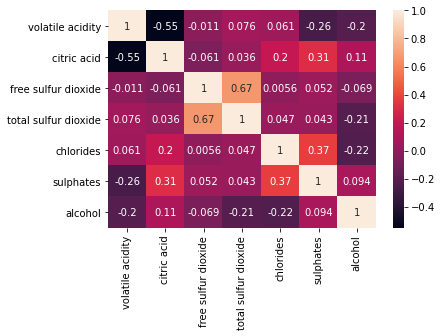

In [9]:
sns.heatmap(df[features].corr(),annot=True)

#### Split into train and test sets

In [10]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df.quality
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Now we can make a TreeRegressor and use it to train the data. You can see  what are default arguments at [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html]

In [11]:
import sklearn.tree as tree
reg = tree.DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2,random_state = 0)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=0)

#### Plot tree diagram

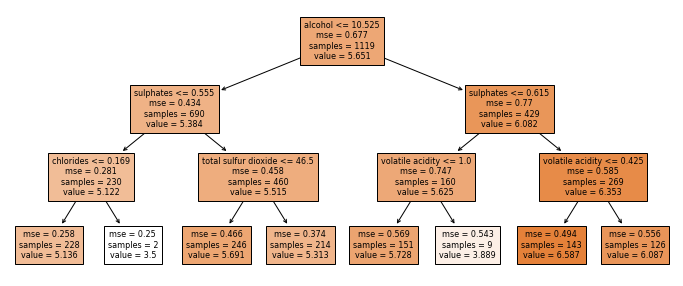

In [12]:
fig, axes = plt.subplots(1,1, figsize=(12,5))

tree.plot_tree(reg, feature_names = list(X_train.columns), filled = True,fontsize=8)
fig.savefig('imagename.png')

####  Because the data is imbalanced the tree has not learned how to predict low or high quality
#### Predict anyway and calculate R^2 and mse for train and test sets

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))

MSE for train 0.43367492507892746
MSE for test 0.48733447337407027
R2 for train 0.35984935757308867
R2 for test 0.17400936716259274


#### The actual Y values are whole numbers. If we round the predictions we can check how many were predicted correctly for each value.

In [14]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})
train_acc['percent']= train_acc.number_correct/train_acc.total*100
print(train_acc)
train_acc['number_correct'].sum()/train_acc['total'].sum()*100

   number_correct  total    percent
3               0      7   0.000000
4               5     38  13.157895
5             305    473  64.482030
6             276    434  63.594470
7              75    154  48.701299
8               0     13   0.000000


59.07059874888293

In [15]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})
test_acc['percent']= test_acc.number_correct/test_acc.total*100
print(test_acc)
test_acc['number_correct'].sum()/test_acc['total'].sum()*100

   number_correct  total    percent
3               0      3   0.000000
4               0     15   0.000000
5             120    208  57.692308
6             123    204  60.294118
7              19     45  42.222222
8               0      5   0.000000


54.58333333333333

#### Can we improve the results by tuning arguments?

In [16]:
reg = tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 10,random_state = 0)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))

MSE for train 0.3526905818534921
MSE for test 0.45226252590794336
R2 for train 0.4793909227969688
R2 for test 0.23345334591874


In [17]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})
train_acc['percent']= train_acc.number_correct/train_acc.total*100
print(train_acc)
train_acc['number_correct'].sum()/train_acc['total'].sum()*100

   number_correct  total    percent
3               0      7   0.000000
4               4     38  10.526316
5             363    473  76.744186
6             238    434  54.838710
7              86    154  55.844156
8               0     13   0.000000


61.751563896336016

In [18]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})
test_acc['percent']= test_acc.number_correct/test_acc.total*100
print(test_acc)
test_acc['number_correct'].sum()/test_acc['total'].sum()*100

   number_correct  total    percent
3               0      3   0.000000
4               0     15   0.000000
5             145    208  69.711538
6             106    204  51.960784
7              24     45  53.333333
8               0      5   0.000000


57.291666666666664

#### We could also try linear regressiom to compare

In [19]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)
y_test_pred = lreg.predict(X_test)
y_train_pred = lreg.predict(X_train)
print('MSE for train '+str(mean_squared_error(y_train, y_train_pred)))
print('MSE for test '+str(mean_squared_error(y_test, y_test_pred)))
print('R2 for train '+str(r2_score(y_train, y_train_pred)))
print('R2 for test '+str(r2_score(y_test, y_test_pred)))

MSE for train 0.4306721846400023
MSE for test 0.4064661251983504
R2 for train 0.364281724098936
R2 for test 0.3110743640705925


In [20]:
train_correct = pd.DataFrame({'y':y_train,'pred':y_train_pred.round().astype(int)})
train_correct['correct']=np.where(train_correct.y == train_correct.pred,1,0)
train_acc = pd.DataFrame({'number_correct':train_correct.correct.groupby(train_correct.y).sum(),
                          'total':train_correct.y.value_counts()})
train_acc['percent']= train_acc.number_correct/train_acc.total*100
print(train_acc)
train_acc['number_correct'].sum()/train_acc['total'].sum()*100

   number_correct  total    percent
3               0      7   0.000000
4               1     38   2.631579
5             316    473  66.807611
6             296    434  68.202765
7              35    154  22.727273
8               0     13   0.000000


57.9088471849866

In [21]:
test_correct = pd.DataFrame({'y':y_test,'pred':y_test_pred.round().astype(int)})
test_correct['correct']=np.where(test_correct.y == test_correct.pred,1,0)
test_acc = pd.DataFrame({'number_correct':test_correct.correct.groupby(test_correct.y).sum(),
                          'total':test_correct.y.value_counts()})
test_acc['percent']= test_acc.number_correct/test_acc.total*100
print(test_acc)
test_acc['number_correct'].sum()/test_acc['total'].sum()*100

   number_correct  total    percent
3               0      3   0.000000
4               0     15   0.000000
5             145    208  69.711538
6             146    204  71.568627
7              14     45  31.111111
8               0      5   0.000000


63.541666666666664

(array([  4.,   9.,  34.,  83., 113., 157.,  46.,  23.,   4.,   7.]),
 array([-2.02109508, -1.59209981, -1.16310453, -0.73410926, -0.30511399,
         0.12388129,  0.55287656,  0.98187183,  1.41086711,  1.83986238,
         2.26885765]),
 <BarContainer object of 10 artists>)

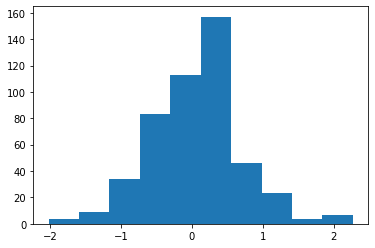

In [22]:
plt.hist( y_test_pred-y_test)